In [2]:
%cd /Users/maayanlab/Documents/Ovarian Cancer Project
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns

/Users/maayanlab/Documents/Ovarian Cancer Project


In [6]:
infile = ("./TCGA-OV-fpkm-uq.txt") ## fpkm raw data
df_expression_fpkm = pd.read_table(infile).set_index("gene_symbol")

In [12]:
# log transforming expression fpkm data
df_expression_fpkm_log = np.log10(df_expression_fpkm + 1)

In [18]:
# filtering for top 1000 variant genes

# first, calculating variance across rows for each gene

expression_variance = []
expression_variance = df_expression_fpkm_log.var(axis=1) # should this be 0?

df_expression_variance = pd.DataFrame(expression_variance)

In [20]:
# 2-sort the values in variance column
df_expression_variance_sorted = df_expression_variance[0].sort_values(ascending = False)

In [22]:
# 3-make the sorted values into df
df_expression_variance_sorted2 = pd.DataFrame(df_expression_variance_sorted)

In [27]:
# 4-take the top 1000 values
df_expression_variance_sorted2_top1000 = df_expression_variance_sorted2[:1000]

In [36]:
# 5-merge to get expression for each patient of top 1000 genes with most variance
df_expression_top1000 = pd.merge(df_expression_variance_sorted2_top1000, df_expression_fpkm_log, how='inner', on=["gene_symbol"])

In [37]:
# 6-transform df (this step is to help with dropping column of variance)
df_expression_top1000 = df_expression_top1000.T

In [39]:
# 7-drop row of variance
df_expression_top1000 = df_expression_top1000[1:1001]

In [41]:
# 8-transform
df_expression_top1000 = df_expression_top1000.T

In [47]:
# zscore across rows
df_expression_top1000_zscore = df_expression_top1000.apply(ss.zscore, axis=0) # should this axis be 1?

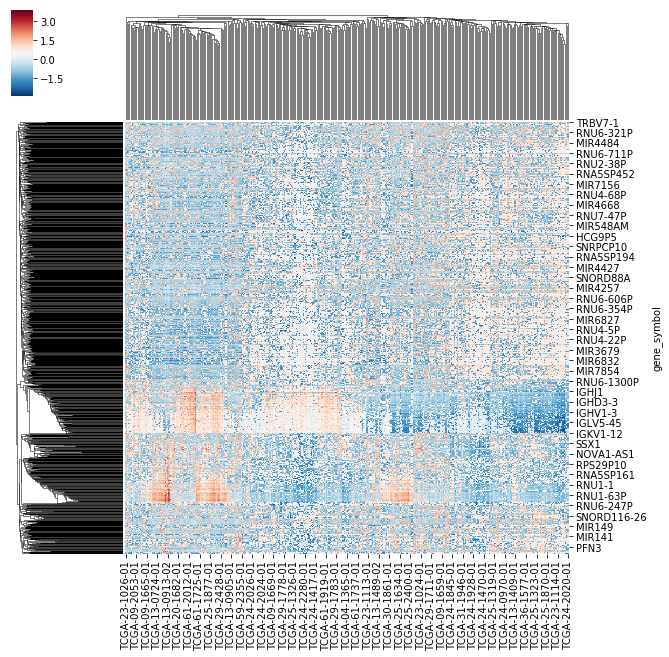

In [52]:
# making heatmap of the expression of the 1000 most variant genes

sns.clustermap(df_expression_top1000_zscore, z_score=0, cmap="RdBu_r")

In [42]:
df_expression_top1000.head()

,TCGA-04-1331-01,TCGA-04-1332-01,TCGA-04-1338-01,TCGA-04-1341-01,TCGA-04-1343-01,TCGA-04-1347-01,TCGA-04-1350-01,TCGA-04-1356-01,TCGA-04-1357-01,TCGA-04-1361-01,...,TCGA-61-2101-01,TCGA-61-2102-01,TCGA-61-2104-01,TCGA-61-2109-01,TCGA-61-2110-01,TCGA-61-2111-01,TCGA-61-2113-01,TCGA-OY-A56Q-01,TCGA-VG-A8LO-01,TCGA-WR-A838-01
gene_symbol,,,,,,,,,,,,,,,,,,,,,
RNU1-21P,4.929138,7.511841,0.000000,0.000000,0.000000,0.000000,5.780771,3.370733,5.261152,4.435943,...,4.453906,0.000000,0.000000,0.000000,3.431374,0.000000,0.000000,0.000000,0.000000,0.000000
PSPHP1,5.821591,0.000000,0.000000,4.784347,0.000000,4.060953,0.000000,5.909606,0.000000,3.117862,...,5.898659,3.638483,3.101974,5.779484,0.000000,3.630911,5.693714,5.973457,5.931976,5.758375
IGKJ5,4.282806,4.209925,0.000000,4.288780,5.106390,0.000000,0.000000,0.000000,5.291496,0.000000,...,3.855907,0.000000,4.938492,0.000000,0.000000,4.166666,5.177319,0.000000,0.000000,0.000000
IGHJ3,0.000000,0.000000,4.328912,4.178374,4.628008,4.088425,0.000000,4.193598,5.181084,0.000000,...,3.745512,0.000000,4.974207,0.000000,0.000000,4.959318,5.274032,0.000000,4.250770,0.000000
IGHJ3P,4.339708,0.000000,0.000000,3.868601,5.096348,0.000000,0.000000,0.000000,5.508101,0.000000,...,3.736740,4.055062,4.965434,3.949427,0.000000,4.746427,5.558733,0.000000,3.764925,0.000000
